In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy as copylib
np.random.seed(0)

In [79]:
df = pd.read_csv('hjm_data.csv').set_index('time')/100
df

,1/12,1/2,1,1.5,2,2.5,3,3.5,4,4.5,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
time,,,,,,,,,,,,,,,,,,,,,
1,0.057734,0.064382,0.067142,0.066512,0.064991,0.063255,0.061534,0.059925,0.058444,0.057058,...,0.034194,0.034772,0.035371,0.035985,0.036612,0.037252,0.037902,0.038562,0.039231,0.039908
2,0.057680,0.064506,0.067502,0.066842,0.065423,0.063852,0.062301,0.060846,0.059490,0.058198,...,0.033790,0.034437,0.035108,0.035798,0.036504,0.037224,0.037959,0.038705,0.039461,0.040227
3,0.057758,0.064410,0.067354,0.066845,0.065577,0.064109,0.062611,0.061164,0.059782,0.058438,...,0.032706,0.033294,0.033907,0.034539,0.035188,0.035853,0.036533,0.037224,0.037927,0.038639
4,0.057430,0.064103,0.066942,0.066215,0.064904,0.063462,0.062006,0.060601,0.059252,0.057933,...,0.031325,0.031891,0.032486,0.033106,0.033748,0.034409,0.035088,0.035784,0.036493,0.037214
5,0.057412,0.063978,0.066358,0.065502,0.064168,0.062722,0.061262,0.059849,0.058488,0.057157,...,0.030119,0.030667,0.031250,0.031862,0.032499,0.033161,0.033844,0.034546,0.035264,0.035997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,0.046421,0.045093,0.042471,0.042081,0.042663,0.043224,0.043640,0.043940,0.044156,0.044314,...,0.040260,0.040098,0.039950,0.039813,0.039687,0.039571,0.039464,0.039365,0.039273,0.039187
1261,0.046233,0.044976,0.042452,0.042131,0.042726,0.043285,0.043699,0.043998,0.044214,0.044374,...,0.040307,0.040147,0.039999,0.039863,0.039737,0.039621,0.039514,0.039414,0.039320,0.039233
1262,0.046348,0.045311,0.043295,0.043266,0.043963,0.044565,0.045003,0.045323,0.045560,0.045739,...,0.041276,0.041118,0.040972,0.040840,0.040718,0.040607,0.040505,0.040411,0.040324,0.040244


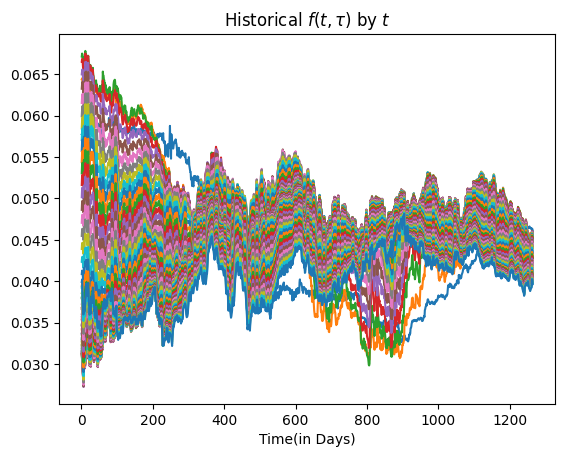

In [80]:
for i, column in enumerate(df.columns):
  plt.xlabel('Time(in Days)')
  plt.title(r'Historical $f(t,\tau)$ by $t$')
  plt.plot(df.index,df.iloc[:,i])
plt.show()

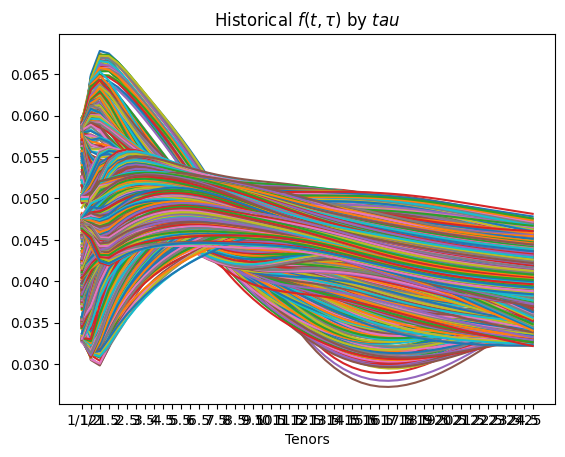

In [81]:
Transpose_df = df.T
for i, column in enumerate(Transpose_df.columns):
  plt.xlabel('Tenors')
  plt.title(r'Historical $f(t,\tau)$ by $tau$')
  plt.plot(Transpose_df.index,Transpose_df.iloc[:,i])
plt.show()

In [82]:
hist_rates = np.matrix(df)
diff_rates = np.diff(hist_rates,axis = 0)
diff_rates

matrix([[-5.35342100e-05,  1.24166900e-04,  3.59546920e-04, ...,
          1.42366970e-04,  2.30220370e-04,  3.19708300e-04],
        [ 7.77080600e-05, -9.63044000e-05, -1.48127260e-04, ...,
         -1.48041707e-03, -1.53431687e-03, -1.58779011e-03],
        [-3.27239240e-04, -3.06464580e-04, -4.11876290e-04, ...,
         -1.44070696e-03, -1.43425956e-03, -1.42534369e-03],
        ...,
        [ 1.14648810e-04,  3.34843340e-04,  8.43050730e-04, ...,
          9.97488500e-04,  1.00371323e-03,  1.01026118e-03],
        [-2.03793900e-05,  3.54394900e-05, -1.11601760e-04, ...,
         -9.74376700e-05, -8.92340900e-05, -8.06706400e-05],
        [-1.89059630e-04, -9.54592800e-05, -2.67699560e-04, ...,
         -5.11702010e-04, -5.13469920e-04, -5.14417150e-04]])

In [83]:
# PCA :- To find out the volatilies of the short rates
sigma = np.cov(diff_rates.transpose())
sigma *= 252
eigval, eigvec = np.linalg.eig(sigma)
eigvec=np.matrix(eigvec)#the prev function returns in the form of array,so converting that into form of matrix
print(eigval)
print(eigvec)

[2.02884026e-03 4.62889282e-04 1.63677691e-04 8.47948767e-05
 5.10134525e-05 3.26491422e-05 1.53862297e-05 3.90765854e-06
 1.45385608e-06 3.99451236e-07 7.74123147e-08 2.25094244e-08
 6.81015644e-09 2.04941493e-09 8.30654947e-10 3.18422245e-10
 1.69855176e-10 1.20686709e-10 8.18818675e-11 4.65678731e-11
 2.41691330e-11 1.26818337e-11 7.83625734e-12 4.07031447e-12
 2.61695756e-12 1.78999756e-12 1.07235512e-12 6.26514628e-13
 3.36669730e-13 2.89485595e-13 2.09893611e-13 2.02355358e-13
 1.20792329e-13 9.80002385e-14 7.30538921e-14 5.84913632e-14
 5.01860659e-14 4.50411925e-14 4.25136399e-14 3.00504010e-14
 1.99691978e-14 1.44931339e-14 8.67086497e-15 6.67526286e-15
 5.37126539e-15 4.23435562e-15 2.52347310e-15 1.26739541e-15
 4.35027379e-17 2.51651947e-16 1.87339489e-16]
[[ 3.51033246e-03 -9.72624697e-03 -1.11507682e-03 ... -1.13479345e-08
  -4.15558626e-08 -6.85383218e-08]
 [ 5.66558601e-02 -1.63267177e-01  2.73137839e-01 ... -1.65022243e-07
   1.66265610e-07  3.59639264e-07]
 [ 1.011427

Principal eigenvalues
[0.00202884 0.00046289 0.00016368]

Principal eigenvectors
[[ 0.00351033 -0.00972625 -0.00111508]
 [ 0.05665586 -0.16326718  0.27313784]
 [ 0.10114279 -0.2389149   0.40222423]
 [ 0.11563974 -0.24345609  0.35581018]
 [ 0.12154093 -0.23509872  0.27474251]
 [ 0.12568249 -0.22656368  0.19585028]
 [ 0.12948968 -0.21903235  0.12500321]
 [ 0.13320457 -0.21206961  0.0623539 ]
 [ 0.13681963 -0.2051638   0.00709335]
 [ 0.14026214 -0.19791715 -0.04135353]
 [ 0.14344533 -0.19001071 -0.08325192]
 [ 0.1462834  -0.18118042 -0.11865757]
 [ 0.14870205 -0.17120748 -0.14754572]
 [ 0.15064229 -0.15990426 -0.16990336]
 [ 0.15207044 -0.14712506 -0.18581986]
 [ 0.15298157 -0.13278428 -0.19552188]
 [ 0.15340022 -0.11686787 -0.19936452]
 [ 0.15337685 -0.09943599 -0.19785291]
 [ 0.15297871 -0.08062996 -0.19159875]
 [ 0.15228467 -0.06067689 -0.18129946]
 [ 0.15138052 -0.03988003 -0.16770213]
 [ 0.15035008 -0.01860959 -0.15155688]
 [ 0.1492673   0.00271527 -0.13358986]
 [ 0.14819153  0.02367

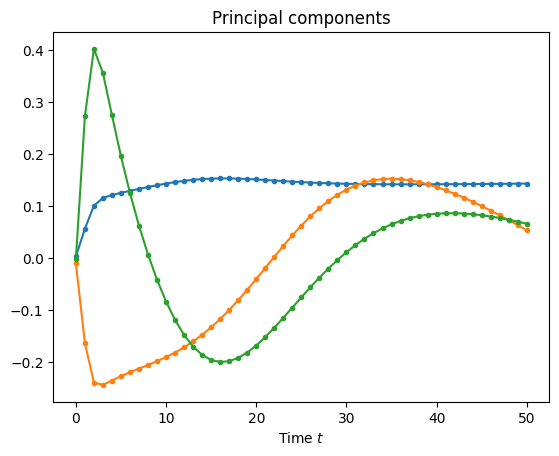

In [84]:
factors=3
index_eigvec = list(reversed(eigval.argsort()))[0:factors]   
princ_eigval = np.array([eigval[i] for i in index_eigvec])
princ_comp = np.hstack([eigvec[:,i] for i in index_eigvec])
print("Principal eigenvalues")
print(princ_eigval)
print()
print("Principal eigenvectors")
print(princ_comp)
plt.plot(princ_comp, marker='.'), plt.title('Principal components'), plt.xlabel(r'Time $t$');

vols shape: (51, 3)


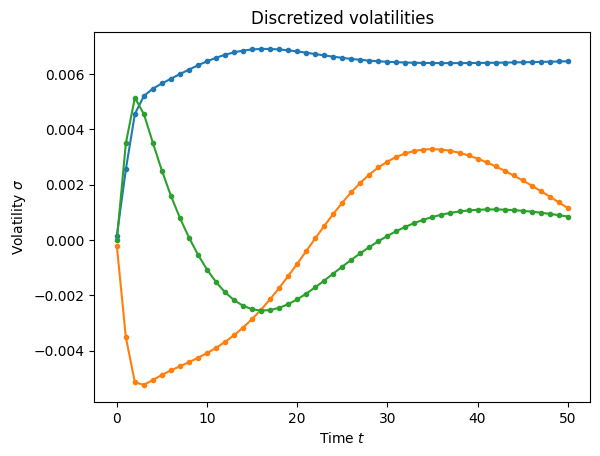

In [85]:
sqrt_eigval = np.matrix(princ_eigval ** .5)
tmp_m = np.vstack([sqrt_eigval for i in range(princ_comp.shape[0])])  # resize matrix (1,factors) to (n, factors)
vols = np.multiply(tmp_m, princ_comp) # multiply matrice element-wise
print('vols shape: ' + str(vols.shape))
plt.plot(vols, marker='.'), plt.xlabel(r'Time $t$'), plt.ylabel(r'Volatility $\sigma$'), plt.title('Discretized volatilities');

In [86]:

def get_matrix_column(mat, i):
    return np.array(mat[:,i].flatten())[0]

class PolynomialInterpolator:
    def __init__(self, params):
        assert type(params) == np.ndarray
        self.params = params
    def calc(self, x):
        n = len(self.params)
        C = self.params
        X = np.array([x**i for i in reversed(range(n))])
        return sum(np.multiply(X, C))

In [87]:
fitted_vols = []


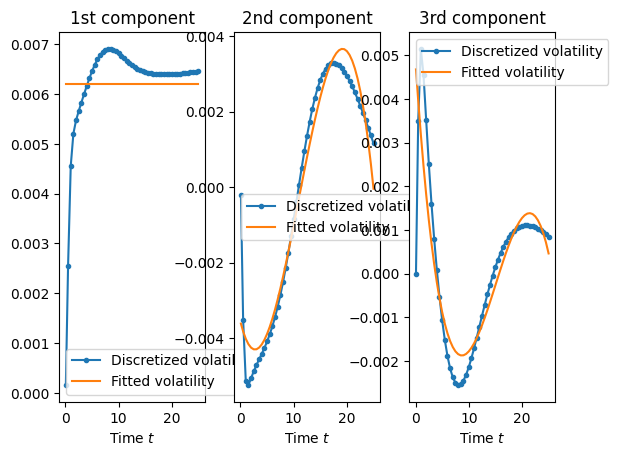

In [88]:
tenors = [eval(x) for x in df.columns]

def fit_volatility(i, degree, title):
    vol = get_matrix_column(vols, i)
    fitted_vol = PolynomialInterpolator(np.polyfit(tenors, vol, degree))    
    plt.plot(tenors, vol, marker='.', label='Discretized volatility')
    plt.plot(tenors, [fitted_vol.calc(x) for x in tenors], label='Fitted volatility')
    plt.title(title), plt.xlabel(r'Time $t$'), plt.legend();
    fitted_vols.append(fitted_vol)
    
plt.subplot(1, 3, 1), fit_volatility(0, 0, '1st component');
plt.subplot(1, 3, 2), fit_volatility(1, 3, '2nd component');
plt.subplot(1, 3, 3), fit_volatility(2, 3, '3rd component');

In [89]:
mc_tenors = np.linspace(0,25,51)
# Discretize fitted volfuncs for the purpose of monte carlo simulation
mc_vols = np.matrix([[fitted_vol.calc(tenor) for tenor in mc_tenors] for fitted_vol in fitted_vols]).transpose()
print(mc_vols)

[[ 6.21159525e-03 -3.56815899e-03  4.82391142e-03]
 [ 6.21159525e-03 -3.82067220e-03  3.96960494e-03]
 [ 6.21159525e-03 -4.01702773e-03  3.18475746e-03]
 [ 6.21159525e-03 -4.15991147e-03  2.46698455e-03]
 [ 6.21159525e-03 -4.25200932e-03  1.81390178e-03]
 [ 6.21159525e-03 -4.29600718e-03  1.22312472e-03]
 [ 6.21159525e-03 -4.29459093e-03  6.92268926e-04]
 [ 6.21159525e-03 -4.25044647e-03  2.18949978e-04]
 [ 6.21159525e-03 -4.16625970e-03 -1.99216560e-04]
 [ 6.21159525e-03 -4.04471652e-03 -5.64615118e-04]
 [ 6.21159525e-03 -3.88850281e-03 -8.79630129e-04]
 [ 6.21159525e-03 -3.70030447e-03 -1.14664603e-03]
 [ 6.21159525e-03 -3.48280740e-03 -1.36804724e-03]
 [ 6.21159525e-03 -3.23869749e-03 -1.54621820e-03]
 [ 6.21159525e-03 -2.97066063e-03 -1.68354334e-03]
 [ 6.21159525e-03 -2.68138272e-03 -1.78240709e-03]
 [ 6.21159525e-03 -2.37354966e-03 -1.84519389e-03]
 [ 6.21159525e-03 -2.04984734e-03 -1.87428816e-03]
 [ 6.21159525e-03 -1.71296165e-03 -1.87207434e-03]
 [ 6.21159525e-03 -1.36557849e-

In [90]:
def integrate(f, x0, x1, dx):
    n = (x1-x0)/dx+1
    out = 0
    for i, x in enumerate(np.linspace(x0, x1, int(n))):
        if i==0 or i==n-1:
            out += 0.5 * f(x)
        else:
            out += f(x)  
    out *= dx
    return out

In [91]:
def m(tau, fitted_vols):
    
    out = 0.
    for fitted_vol in fitted_vols:
        assert isinstance(fitted_vol, PolynomialInterpolator)
        out += integrate(fitted_vol.calc, 0, tau, 0.01) * fitted_vol.calc(tau)
    return out

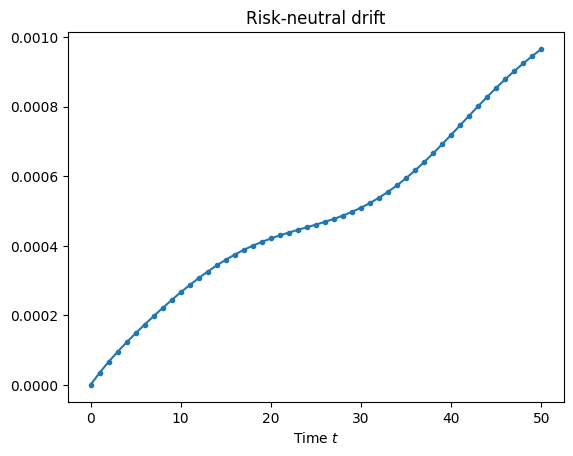

In [92]:
mc_drift = np.array([m(tau, fitted_vols) for tau in mc_tenors])
plt.plot(mc_drift, marker='.'), plt.xlabel(r'Time $t$'), plt.title('Risk-neutral drift');
curve_spot = np.array(hist_rates[-1,:].flatten())[0]


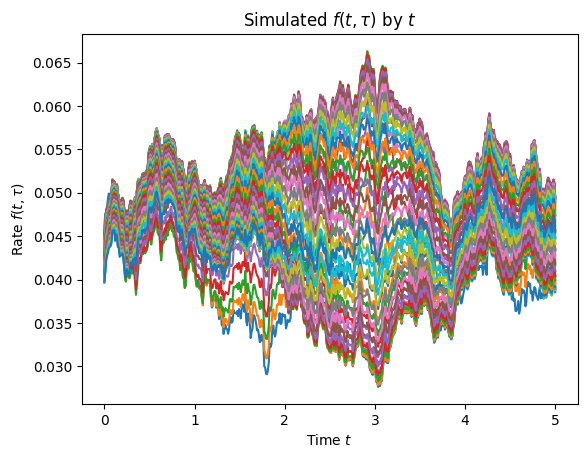

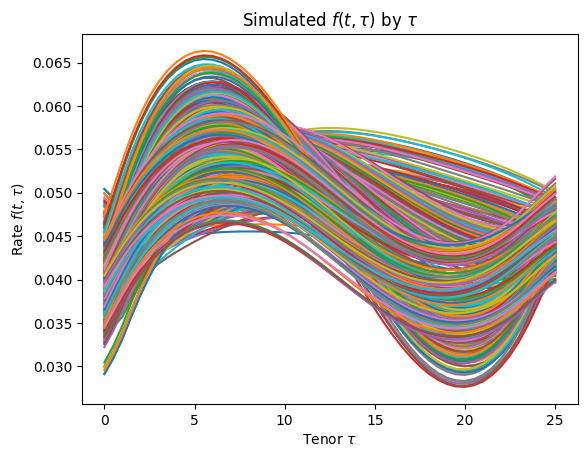

In [93]:
def simulation(f, tenors, drift, vols, timeline):
    assert type(tenors)==np.ndarray
    assert type(f)==np.ndarray
    assert type(drift)==np.ndarray
    assert type(timeline)==np.ndarray
    assert len(f)==len(tenors)
    vols = np.array(vols.transpose())  # 3 rows, T columns
    len_tenors = len(tenors)
    len_vols = len(vols)
    yield timeline[0], copylib.copy(f)
    for it in range(1, len(timeline)):
        t = timeline[it]
        dt = t - timeline[it-1]
        sqrt_dt = np.sqrt(dt)
        fprev = f
        f = copylib.copy(f)
        random_numbers = [np.random.normal() for i in range(len_vols)]
        for iT in range(len_tenors):
            val = fprev[iT] + drift[iT] * dt
            #
            sum = 0
            for iVol, vol in enumerate(vols):
                sum += vol[iT] * random_numbers[iVol]
            val += sum * sqrt_dt
            #
            iT1 = iT+1 if iT<len_tenors-1 else iT-1   
            dfdT = (fprev[iT1] - fprev[iT]) / (iT1 - iT)
            val += dfdT * dt
            #
            f[iT] = val
        yield t,f
proj_rates = []
proj_timeline = np.linspace(0,5,500)

for i, (t, f) in enumerate(simulation(curve_spot, mc_tenors, mc_drift, mc_vols, proj_timeline)):
   
    proj_rates.append(f)
proj_rates = np.matrix(proj_rates)
plt.plot(proj_timeline.transpose(), proj_rates), plt.xlabel(r'Time $t$'), plt.ylabel(r'Rate $f(t,\tau)$');
plt.title(r'Simulated $f(t,\tau)$ by $t$'), plt.show();
plt.plot(mc_tenors, proj_rates.transpose()), plt.xlabel(r'Tenor $\tau$'), plt.ylabel(r'Rate $f(t,\tau)$');
plt.title(r'Simulated $f(t,\tau)$ by $\tau$'), plt.show();